# 442 Poisson Fit

In [1]:
#Import ueful librarie and functions to use in your analysis
import numpy as np
#from scipy.stats import poisson
import matplotlib.pyplot as plt

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
# Random data points with Poisson distribution with mean 100 - put your data points here

file_kv = open("time.txt", "r")
file_kv.readline()
file_kv.readline()
file_kv.readline()
data = []
sx=[]
for line in file_kv:
    data.append(float(line))
    sx.append(np.sqrt(float(line)))
ndata = len(data)

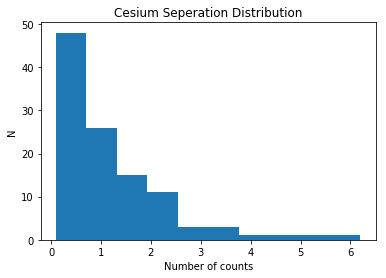

In [3]:
#Plot the histogram of your data with a given bin number (here 20)
plt.figure()
plt.hist(data,10)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Cesium Seperation Distribution")
plt.show()

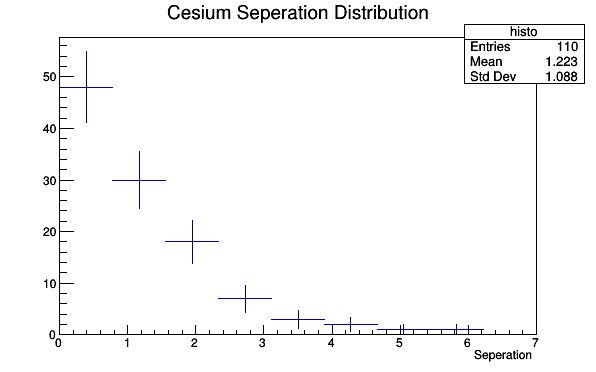

In [4]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

#define a histogram with 20 bins between 60-120 (Change these values according to your data sets!!!)
histo = TH1F("histo", "Cesium Seperation Distribution", 9, 0, 7) 
#Label the X-Y axis
histo.GetYaxis().SetTitle("")
histo.GetXaxis ().SetTitle ("Seperation ");

#Fill the randomly generated data into your histogram
for data_point in data:
    histo.Fill(data_point)

#Draw your histogram with error bars and draw it on the canvas
histo.SetFillColor(10)
histo.Draw("E")
c1.Draw()

 FCN=3.21478 FROM MINOS     STATUS=SUCCESSFUL     28 CALLS         120 TOTAL
                     EDM=1.03875e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.01335e+02   1.03869e+01  -2.49687e-02  -3.32071e-07
   2  p1           9.10393e-01   1.19645e-01   1.19645e-01   2.26327e-05


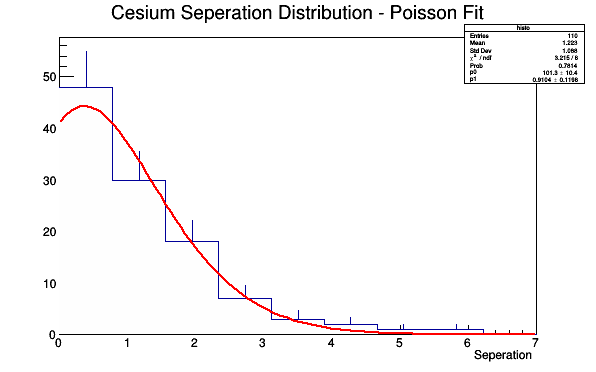

In [5]:
 #Define the Poisson function from TMath library in ROOT to fit with two parameters:
#[0]: normalizing constant
#[1]: mean
fpois = TF1("fpois","[0]*TMath::Poisson(x,[1])",0,7) #(Change interval values (60,120) according to your data sets!!!)
histo.Draw("E")
#Set the parameters to guide the ROOT fitter to converge easily and fit your histogram
fpois.SetParameters(1, 1) # give reasonable estimates for your parameters to guide ROOT fit to converge
fpois.SetFillColor(42);
histo.Fit("fpois", "E")
histo.SetTitle("Cesium Seperation Distribution - Poisson Fit")
#Set the options to display fit parameters and chi_squared value on the graph
gStyle.SetOptFit(1111)
histo.Draw("same")
c1.Draw()

 FCN=1.39051 FROM MINOS     STATUS=FAILURE       645 CALLS        1895 TOTAL
                     EDM=8.3746e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.79989e+02   2.86195e+03   4.80828e+13   0.00000e+00
   2  Mean        -5.88378e+00   1.92118e+01  -2.87973e+06   0.00000e+00
   3  Sigma        3.10269e+00   3.47200e+00   3.47200e+00  -4.05331e+02


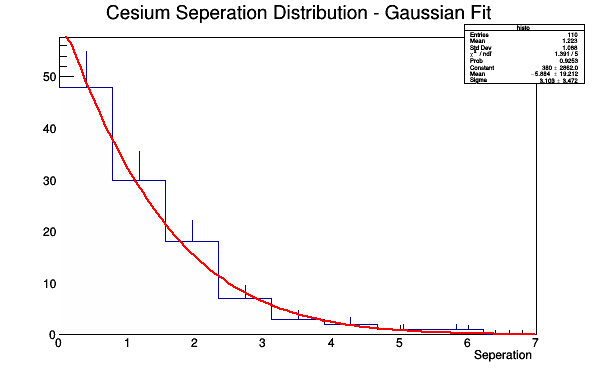

In [6]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(1, 1, 5) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(45);
histo.Fit("fgaus", "E")

histo.SetTitle("Cesium Seperation Distribution - Gaussian Fit")
histo.Draw("same")
c1.Draw("same")

 FCN=1.81395 FROM MINOS     STATUS=SUCCESSFUL     14 CALLS         129 TOTAL
                     EDM=5.86903e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.11972e-01   8.16591e-02  -5.50329e-06  -3.42016e-06
   2  p1           8.61007e+01   8.27791e+00   8.27791e+00  -3.08650e-06


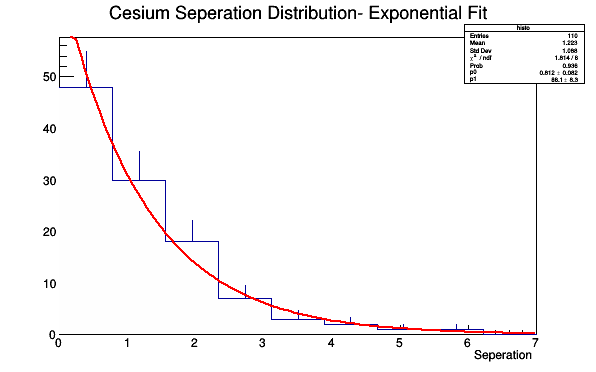

In [7]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
exp = TF1("exp","[1]*[0]*TMath::Exp(-[0]*x)")
exp.SetParameters(50,50) # give reasonable estimates for your parameters to guide ROOT fit to converge
exp.SetFillColor(45);
histo.Fit("exp", "E")

histo.SetTitle("Cesium Seperation Distribution- Exponential Fit")
histo.Draw("same")
c1.Draw("same")